#**CS355: Introduction to Large Language Models (LLMs)**
---
## **Assignment 1:** Sentiment Classification

### Student Name: <code>[Ali Muhammad Asad]</code>
### Student ID: <code>[aa07190]</code>

## **Assignment Objectives**
This assignment will guide students through the process of creating a vocabulary, generating embeddings, and training a feedforward neural network for sentiment analysis. By the end of the assignment, students will:
*   Understand how to create a vocabulary.

*   Understand how embedding layers work.

*   Implement custom embeddings for a neural network.

*   Implement and train a simple sentiment analysis model using PyTorch

*   Evaluate the trained model on the test set.



---

## **READ THESE INSTRUCTIONS FIRST**

* There are exactly **12** tasks in this notebook. Most require writing Python code and a few require writing text descriptions. Use a text (markdown) cell for the descriptive answers.

* Do not change or remove any pre-written code. The provided code is included intentionally. Make sure to pay special attention to import statements, variable names, and pre-written comments in the code cells.

* Carefully read the task description before beginning each task to ensure you understand what is required.

* **There is no penalty for using AI assistance on this homework** as long as you fully disclose it and understand the solution you have provided. If you do use AI please disclose its use in the cell below.

* Ensure that all code cells in your notebook are executed before submission, with the output clearly visible. If errors are encountered during evaluation, marks will only be awarded for tasks completed up to the error-producing cell. Any attempt to misrepresent the output, such as showing results not generated by the code, will be considered a violation of academic integrity, resulting in an automatic score of zero for the assignment.

* Tasks 1 through 8 will be evaluated using automated tests using `inputs.txt`, while Tasks 9 through 11 will be graded based on the graphs you generate. Task 12 requires an improvement on the results from Tasks 1 to 11. Points for Task 12 will only be awarded if your test accuracy surpasses that of the model trained in the previous tasks.

* **Submit the completed and fully executed notebook file as your final submission**.




 ### Did you use any AI assistance to complete this assignment?
* *your response here*



---

In [1]:
# !pip install ipytest --break-system-packages
import ipytest
import pytest
ipytest.autoconfig(magics=True)

## **Dataset**

Sentiment classification involves analyzing a piece of text and determining its emotional tone, typically categorized as positive, negative, or neutral.

For this assignment we will use the IMDB Review Dataset for binary sentiment classification (positive or negative). This dataset contains labeled movie reviews.

**Do the following:**

Run the code cells below to load the dataset and see positive and negative sentiment examples.

In [2]:
# !pip install datasets

In [3]:
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset("imdb")

# Extract texts and labels into lists
train_texts = [example['text'] for example in dataset['train']]
train_labels = [example['label'] for example in dataset['train']]

test_texts = [example['text'] for example in dataset['test']]
test_labels = [example['label'] for example in dataset['test']]

# Combine into a single list if needed
texts = train_texts + test_texts
labels = train_labels + test_labels

The IMDB dataset consists of 50,000 reviews:

In [4]:
print(len(texts)) #list of all reviews
print(len(labels)) #list of all labels

50000
50000


In [5]:
#negative sentiment example
print("Review:", texts[0])
print(f"Sentiment: {labels[0]}(Negative)",end="\n\n")

#positive sentiment example
print("Review:", texts[49000])
print(f"Sentiment: {labels[49000]}(Positive)")

Review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far betw

---

## **Task 1: Preprocess and Tokenize**
## 10 Points



Before we can use the IMDB dataset to train a machine learning model, we need to preprocess and tokenize the reviews. Preprocessing ensures the data is clean and consistent for training.

**Do the following:**

Complete the function `preprocess_and_tokenize_review` below. The function takes a single review (a string) as input and returns a list of tokens (words).

*The function should:*

* Convert all text to lowercase.
* Remove special characters (this does not include punctuation).
* Split the cleaned text into a list of words (tokens) using whitespace.

In [7]:
import re
def preprocess_and_tokenize_review(review):
    """
    preprocesses and tokenizes reviews

    Args:
        review (str): one review from the dataset

    Returns:
        list of tokens (words)
    """
    # Convert text to lowercase
    review = review.lower()

    # Remove special characters
    review = re.sub(r"[^a-z0-9]+@#$%^&", " ", review)
    pattern = r'[\[\](){}]'
    review = re.sub(pattern, '', review)


    #tokenize into words
    tokenized_review = review.split()

    return tokenized_review

tokenized_texts = [preprocess_and_tokenize_review(text) for text in texts]
print(tokenized_texts[0])
assert len(tokenized_texts) == len(texts)

['i', 'rented', 'i', 'am', 'curious-yellow', 'from', 'my', 'video', 'store', 'because', 'of', 'all', 'the', 'controversy', 'that', 'surrounded', 'it', 'when', 'it', 'was', 'first', 'released', 'in', '1967.', 'i', 'also', 'heard', 'that', 'at', 'first', 'it', 'was', 'seized', 'by', 'u.s.', 'customs', 'if', 'it', 'ever', 'tried', 'to', 'enter', 'this', 'country,', 'therefore', 'being', 'a', 'fan', 'of', 'films', 'considered', '"controversial"', 'i', 'really', 'had', 'to', 'see', 'this', 'for', 'myself.<br', '/><br', '/>the', 'plot', 'is', 'centered', 'around', 'a', 'young', 'swedish', 'drama', 'student', 'named', 'lena', 'who', 'wants', 'to', 'learn', 'everything', 'she', 'can', 'about', 'life.', 'in', 'particular', 'she', 'wants', 'to', 'focus', 'her', 'attentions', 'to', 'making', 'some', 'sort', 'of', 'documentary', 'on', 'what', 'the', 'average', 'swede', 'thought', 'about', 'certain', 'political', 'issues', 'such', 'as', 'the', 'vietnam', 'war', 'and', 'race', 'issues', 'in', 'the',

In [ ]:
#DONOT ALTER THIS CODE!
#USE THIS CODE FOR TESTING YOUR SOLUTION
%%ipytest -vvrN --tb=short

with open('inputs.txt', 'r') as file:
    file_content = file.read()

test_inputs = eval(file_content)
tests = test_inputs["test_preprocess_tokenize"]

@pytest.mark.parametrize("inputs, expected", tests)
def test_task1(inputs, expected):
    out = str(preprocess_and_tokenize_review(inputs))
    assert out == str(expected), (
        f'\nYour Output:\n    {repr(out)}\n'
        f'Expected Output:\n    {repr(str(expected))}'
    )

def test_lengthConsistency_IMDB():
    assert len(tokenized_texts) == len(texts), (
        f"Length mismatch: len(tokenized_texts)={len(tokenized_texts)} != len(texts)={len(texts)}"
    )

UsageError: Line magic function `%%ipytest` not found.


---

## **Task 2: Split the Dataset into Train, Validation, and Test Sets**
## 5 Points

Now that the dataset has been tokenized, the next step is to split it into training, validation, and test sets.

Explanation of the Splits:
* **Training Set:**
The largest portion of the dataset, used to train the model. The model learns patterns and relationships from this data.
* **Validation Set:**
A smaller portion of the dataset, used during training to evaluate the model's performance on unseen data and to tune hyperparameters. This helps prevent overfitting.
* **Test Set:**
A completely separate portion of the dataset, used after training to assess the final performance of the model on truly unseen data.

**Do the following:**

Complete the code below to split the dataset into train, val, and test sets. Use a fixed random seed to ensure reproducibility of results. This means that every time the code runs, the splits will be the same.

In [12]:
from sklearn.model_selection import train_test_split

#split into train(60%) and val_test(40%)
x_train, x_val_test, y_train, y_val_test = train_test_split(tokenized_texts, labels, test_size=0.4, random_state=42)

#split val_test into val(50%) and test(50%)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

In [13]:
print("Training Set:")
print(len(x_train))
print(len(y_train))
print()

print("Validation Set:")
print(len(x_val))
print(len(y_val))
print()

print("Test Set:")
print(len(x_test))
print(len(y_test))
print()

assert len(x_train) == len(y_train)
assert len(x_val) == len(y_val)
assert len(x_test) == len(y_test)
assert len(x_train + x_val + x_test) == len(texts)

print(x_train[0])
print(y_train[0])

Training Set:
30000
30000

Validation Set:
10000
10000

Test Set:
10000
10000

['the', 'story', 'of', 'peace-loving', 'farmers', 'and', 'townspeople', 'fighting', 'for', 'land,', 'water,', 'law', 'and', 'order,', 'and', 'the', 'respect', 'and', 'ultimate', 'subjugation', 'of', 'the', 'long', 'entrenched', 'cattle', 'interests', 'and', 'their', 'hired', 'guns', 'had', 'been', 'worked', 'over', 'better', 'in', 'earlier', 'shane', 'and', 'probably', 'later', 'films', 'as', 'well.', "there's", 'some', 'good', 'action', 'scenes', 'and', 'the', 'general', 'layout', 'of', 'the', 'story,', 'excluding', 'a', 'disappointing', 'ending,', 'is', 'well', 'executed.', 'law', 'and', 'order', 'and', 'religion', 'have', 'established', 'roots', 'in', 'the', 'town,', 'but', 'the', 'old', 'order', 'of', 'cattle', 'drives,', 'cowboys,', 'and', 'gunslingers', 'is', 'still', 'around', 'as', 'well.', 'the', 'clash', 'of', 'the', 'two', 'occurs', 'in', 'a', 'nicely', 'staged', 'ambush', 'scene', 'where', 'the',

In [14]:
#DONOT ALTER THIS CODE!
#USE THIS CODE FOR TESTING YOUR SOLUTION

%%ipytest -vvrN --tb=short
def test_task2():
    assert len(x_train) == 30000, (
        f"Length mismatch: len(x_train)={len(x_train)} != 30000"
    )
    assert len(x_val) == 10000, (
        f"Length mismatch: len(x_train)={len(x_train)} != 10000"
    )
    assert len(x_test) == 10000, (
        f"Length mismatch: len(x_train)={len(x_train)} != 10000"
    )
    assert len(x_train) == len(y_train), (
        f"Length mismatch: len(x_train)={len(x_train)} != len(y_train)={len(y_train)}"
    )
    assert len(x_val) == len(y_val), (
        f"Length mismatch: len(x_val)={len(x_val)} != len(y_val)={len(y_val)}"
    )
    assert len(x_test) == len(y_test), (
        f"Length mismatch: len(x_test)={len(x_test)} != len(y_test)={len(y_test)}"
    )
    assert len(x_train + x_val + x_test) == len(texts), (
        f"Total length mismatch: len(x_train + x_val + x_test)={len(x_train + x_val + x_test)} != len(texts)={len(texts)}"
    )

UsageError: Line magic function `%%ipytest` not found.


---

## **Task 3: Create Vocabulary**
## 10 Points

Now we need to convert the text into a format that the model can understand. A vocabulary is a mapping of unique words (tokens) to numerical indices, allowing text data to be represented numerically.

**Do the following:**

Create a vocabulary using the training dataset. Complete the function `create_vocabulary` that processes the tokenized training set and generates a vocabulary dictionary.

*The function should:*

* Flatten the Tokenized Dataset:

    Combine all the lists of tokens (i.e., tokenized reviews) into a single list of tokens. For example if the training set is
    ```
    [['I', 'am', 'in', 'the', 'sky'], ['pie', 'in', 'the', 'sky']]
    ```
    the flattened dataset will be
    ```
    ['I', 'am', 'in', 'the', 'sky', 'pie']
    ```

* Count Word Frequencies:

    Count how many times each token appears in the training dataset.

* Limit the Vocabulary Size:

    Retain only the most frequent tokens from the dataset. This ensures that the vocabulary focuses on the most important tokens while avoiding rare ones that contribute less to the model’s performance. For this assignment we will limit the vacabulary size to `25000` tokens.

* Add Special Tokens:

    Add the following special tokens to the vocabulary:
    * `<PAD>`: A token for padding sequences to make them of equal length. Assign this token an index of 0.
    * `<OOV>`: A token for words that are not in the vocabulary (out-of-vocabulary words). Assign this token an index of 1.

    Note that this will increase the vocabulary size by 2 tokens making the length of the vocabulary 25002.

* Create a Word-to-Index Mapping:

    Assign indices starting from 2 to the top max_vocab_size words.
    The final vocabulary will be a dictionary where:
    * Keys are words (strings).
    * Values are their corresponding indices (integers).
    * The special tokens will be assigned indices 0 and 1.

In [15]:
from collections import Counter

def create_vocabulary(tokenized_texts, max_vocab_size):
    """
    Creates a vocabulary from a list of tokenized texts.

    Args:
        tokenized_texts (list of list of str): A list of tokenized texts where each text is a list of tokens (words).
        max_vocab_size (int): The maximum number of words to include in the vocabulary. The most frequent words up to this size will be selected.

    Returns:
        dict: A dictionary representing the vocabulary where each key is a word and each value is its corresponding index.
              Special tokens "<PAD>" and "<OOV>" are also included in the vocabulary at indices 0 and 1, respectively.
    """

    vocab = {} # Initialize the vocabulary dict

    # Flatten the list of tokenized texts into a single list of words
    flattened = [word for text in tokenized_texts for word in text]

    # Count word frequencies
    token_count = Counter(flattened)

    # Select the top `max_vocab_size` most common words.
    most_common_tokens = token_count.most_common(max_vocab_size)

    # Add special tokens to the vocabulary
    vocab["<PAD>"] = 0  # Padding token
    vocab["<OOV>"] = 1  # Out-of-vocabulary token

    # Create a word-to-index mapping (vocabulary)
    for idx, (word, count) in enumerate(most_common_tokens, start=2):
        vocab[word] = idx

    return vocab

# Create the vocabulary
vocab = create_vocabulary(x_train, max_vocab_size=25000)

# Print a sample of the vocabulary
print("Index of 'a':", vocab['a']) #should be in the vocabulary
print("Sample vocabulary:", list(vocab.items())[:10])
print("Vocabulary size:", len(vocab))

assert type(vocab) == type({})
assert vocab["<PAD>"] == 0
assert vocab["<OOV>"] == 1
assert len(vocab) == 25002

Index of 'a': 3
Sample vocabulary: [('<PAD>', 0), ('<OOV>', 1), ('the', 2), ('a', 3), ('and', 4), ('of', 5), ('to', 6), ('is', 7), ('in', 8), ('i', 9)]
Vocabulary size: 25002


In [11]:
#DONOT ALTER THIS CODE!
#USE THIS CODE FOR TESTING YOUR SOLUTION

%%ipytest -vvrN --tb=short
with open('inputs.txt', 'r') as file:
    file_content = file.read()

test_inputs = eval(file_content)
tests = test_inputs["test_create_vocab"]

@pytest.mark.parametrize("inputs, expected", tests)
def test_task3(inputs, expected):
    out = str(create_vocabulary(eval(inputs),50))
    assert out == str(expected), (
        f'\nYour Output:\n    {repr(out)}\n'
        f'Expected Output:\n    {repr(str(expected))}'
    )

def test_vocab_type_length_consistency():
    assert type(vocab) == type({}), (
        f"Type mismatch: type(vocab)={type(vocab)} != {type({})}"
    )
    assert vocab["<PAD>"] == 0, (
        f"""<PAD> token not assigned index 0: vocab["<PAD>"] != 0"""
    )
    assert vocab["<OOV>"] == 1, (
        f"""<OOV> token not assigned index 1: vocab["<OOV>"] != 1"""
    )
    assert len(vocab) == 25002, (
        f"Length mismatch: len(vocab)={len(vocab)} != 25002"
    )

UsageError: Line magic function `%%ipytest` not found.


---

## **Task 4: Encode and pad the train, val, and test splits**
## 10 Points

Encoding involves converting each word in a tokenized review into an integer, using the vocabulary we created in the previous task. Each word will be replaced by its corresponding index from the vocabulary.

**Do the following:**

Complete the function `encode_texts` that takes tokenized text data and the vocabulary as input, encodes the texts into sequences of integers, and pads the sequences to a fixed length of 250 tokens.

*The function should:*

* Convert Tokenized Texts to Integer Sequences:
    * For each token in a review, replace the word with its corresponding index from the vocabulary.
    * If a word is not present in the vocabulary, use the `<OOV>` token's index (index 1).

* Pad Sequences:
    * Ensure that all sequences are of the same length by padding them.
    * Use the `<PAD>` token index (with index 0) to pad sequences that are shorter than the desired length.
    * You should pad the sequences post so that padding is added at the end of the sequence.
    * When the sequence exceeds the max length, *truncate* tokens from the end of the sequence.


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_texts(tokenized_texts, vocab, max_length):
    """
    Converts tokenized texts into sequences of integers and pads them to a fixed length.

    Args:
        tokenized_texts (list of list of str): A list of tokenized texts, where each text is a list of words.
        vocab (dict): A dictionary representing the vocabulary, where each key is a word and each value is its corresponding index.
                      The vocabulary should include special tokens like <PAD> and <OOV>.
        max_length (int): The maximum length of the sequences after padding or truncation.

    Returns:
        numpy.ndarray: A 2D array where each row is a sequence of integers representing a text, and all sequences are padded to the specified `max_length`.
                       Sequences shorter than `max_length` are padded, and sequences longer than `max_length` are truncated.
    """
    # for each token in tokenized texts, replace the word with its corresponding index from the vocab
    encoded = [[vocab.get(token, vocab["<OOV>"]) for token in text] for text in tokenized_texts]
    padded_sequences = pad_sequences(encoded, maxlen=max_length, padding='post', truncating='post')

    return padded_sequences

# Define maximum sequence length
MAX_SEQ_LENGTH = 250

# Encode and pad training and testing data
x_train_encoded = encode_texts(x_train, vocab, MAX_SEQ_LENGTH)
x_val_encoded = encode_texts(x_val, vocab, MAX_SEQ_LENGTH)
x_test_encoded = encode_texts(x_test, vocab, MAX_SEQ_LENGTH)

# Print an example
print("Example encoded review from training set (first 5 words):", x_train_encoded[0][:5])
print("Example encoded review from validation set (first 5 words):", x_val_encoded[0][:5])
print("Example encoded review from test set (first 5 words):", x_test_encoded[0][:5])

print("Shape of training data:", x_train_encoded.shape)
print("Shape of validation data:", x_val_encoded.shape)
print("Shape of test data:", x_test_encoded.shape)

assert x_train_encoded.shape == (len(x_train), MAX_SEQ_LENGTH)
assert x_val_encoded.shape == (len(x_val), MAX_SEQ_LENGTH)
assert x_test_encoded.shape == (len(x_test), MAX_SEQ_LENGTH)

2025-02-02 19:11:46.785951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738505507.038548  266513 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738505507.086329  266513 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-02 19:11:47.511121: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Example encoded review from training set (first 5 words): [    2    77     5     1 14739]
Example encoded review from validation set (first 5 words): [214 412 362   5   2]
Example encoded review from test set (first 5 words): [ 43  23 790   6 153]
Shape of training data: (30000, 250)
Shape of validation data: (10000, 250)
Shape of test data: (10000, 250)


In [17]:
#DONOT ALTER THIS CODE!
#USE THIS CODE FOR TESTING YOUR SOLUTION

%%ipytest -vvrN --tb=short
with open('inputs.txt', 'r') as file:
    file_content = file.read()

test_inputs = eval(file_content)
tests = test_inputs["test_encode_texts"]

@pytest.mark.parametrize("inputs, expected", tests)
def test_task4(inputs, expected):
    tokens, vocab = eval(inputs)
    out = str(encode_texts(tokens,vocab,100))
    assert out == str(expected), (
       f'\nYour Output:\n    {repr(out)}\n'
       f'Expected Output:\n    {repr(str(expected))}'
    )

def test_encoded_data_shape_consistency():
    assert x_train_encoded.shape == (len(x_train), MAX_SEQ_LENGTH), (
        f"Incorrect shape:  x_train_encoded.shape={x_train_encoded.shape} != {(len(x_train), MAX_SEQ_LENGTH)}"
    )
    assert x_val_encoded.shape == (len(x_val), MAX_SEQ_LENGTH), (
        f"""Incorrect shape:  x_val_encoded.shape={x_val_encoded.shape} != {(len(x_val), MAX_SEQ_LENGTH)}"""
    )
    assert x_test_encoded.shape == (len(x_test), MAX_SEQ_LENGTH), (
        f"""Incorrect shape:  x_test_encoded.shape={x_test_encoded.shape} != {(len(x_test), MAX_SEQ_LENGTH)}"""
    )

UsageError: Line magic function `%%ipytest` not found.


---

## **Task 5: Embedding Layer**
## 5 Points

Now that we have fixed length encoded sequences of each review in the dataset, we have to create dense vector embeddings for each encoded sequence.

An embedding is a learned representation of text where each word (or token) is mapped to a dense vector of fixed size. These vectors capture semantic information and relationships between words. Instead of just using raw indices of words (like we did during encoding), the embedding layer transforms each token into a vector, where similar words or tokens have similar vectors.

We use `nn.Embedding` to initialize the embedding layer and set `num_embeddings` as the `vocabulary size` and `embedding_dim` as the embedding (vector) dimension.

**Do the following:**
- Define the embedding layer.
- Take a small batch of 10 padded sequences (`x_train_encoded[:10]` for the first 10 sequences) and pass it through the embedding layer
- Observe the shape and output of the embedded output. What do the values in the shape tensor represent?

In [17]:
import torch
import torch.nn as nn

VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 50

# Define the embedding layer
embedding_layer = nn.Embedding(VOCAB_SIZE, EMBEDDING_DIM)

# Example batch: A small batch of tokenized and padded sequences -> First 10 samples (batch size of 10)
example_batch = torch.tensor(x_train_encoded[:10])

# Pass the batch through the embedding layer
embedded_output = embedding_layer(example_batch)

# Print results
print("Input (word indices):")
print(example_batch)

print("\nOutput (embeddings):")
print(embedded_output)

print("\nEmbedding shape:")
print(embedded_output.shape)

Input (word indices):
tensor([[    2,    77,     5,  ...,     0,     0,     0],
        [    9,    98,    12,  ...,     0,     0,     0],
        [   10,    25,     7,  ...,     0,     0,     0],
        ...,
        [16729,    14,    40,  ...,     0,     0,     0],
        [    9,  2262,     2,  ...,     0,     0,     0],
        [    2,    20,   641,  ...,     0,     0,     0]], dtype=torch.int32)

Output (embeddings):
tensor([[[ 0.3225, -3.2562,  2.0850,  ...,  0.2823,  1.8578,  1.2293],
         [ 1.8933, -0.1097,  0.2824,  ..., -1.5209,  0.1515, -1.3739],
         [ 0.2220,  1.1831,  0.3936,  ...,  2.0921, -0.5704,  1.1270],
         ...,
         [ 0.9889,  0.0539, -0.3263,  ..., -1.0955,  0.8694,  0.8777],
         [ 0.9889,  0.0539, -0.3263,  ..., -1.0955,  0.8694,  0.8777],
         [ 0.9889,  0.0539, -0.3263,  ..., -1.0955,  0.8694,  0.8777]],

        [[-1.1821,  0.3423,  0.7882,  ..., -0.6319,  0.4221, -0.4205],
         [-1.1072,  1.7617, -0.8788,  ..., -1.4923, -0.9360, -

In [19]:
#DONOT ALTER THIS CODE!
#USE THIS CODE FOR TESTING YOUR SOLUTION

%%ipytest -vvrN --tb=short
def test_task5():
    assert example_batch.shape == torch.Size([10, 250]), (
        f"Incorrect tensor shape: example_batch.shape={example_batch.shape} != {torch.Size([10, 250])}"
    )
    assert embedded_output.shape == torch.Size([10, 250, 50]), (
        f"Incorrect tensor shape: embedded_output.shape={embedded_output.shape} != {torch.Size([10, 250, 50])}"
    )

UsageError: Line magic function `%%ipytest` not found.


Descriptive answer here...

The embedded output contains sequences with each word embedded.

For example:

A sequence `[1, 2, 3]` will be mapped to `[[e1], [e2], [e3]]`, where `e1`, `e2`, and `e3` are the embeddings of size 100 for tokens `1`, `2`, and `3`, respectively. The embedding_layer operates at the token level, not the sequence level. It does not produce a single embedding for the entire sequence. To generate a sequence embeddings we pass the word embeddings through a transformer encoder. The transformer will learn how to contextualize each word in the sequence based on other words in the sequence. The initial token `[CLS]` will then have an embedding that represents the entire sequence. You do not have to worry about understanding this now. This will be clear to you in the upcoming lectures.

 Run the code cell below to get embeddings for each sequence.

In [18]:
word_embeddings = embedded_output.permute(1, 0, 2)  # Shape: [seq_len, batch_size, embedding_dim]
# Define a transformer encoder
transformer_layer = nn.TransformerEncoderLayer(d_model=EMBEDDING_DIM, nhead=1)
transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=1)

# Pass word embeddings through transformer encoder
transformer_output = transformer_encoder(word_embeddings)  # Shape: [seq_len, batch_size, embedding_dim]

# Get the output for the [CLS] token (first token in the sequence)
sequence_embeddings = transformer_output[0, :, :]  # Shape: [batch_size, embedding_dim] for the [CLS] token

print("Sequence Embeddings (Transformer) Shape:", sequence_embeddings.shape) #10 sequences

print(len(sequence_embeddings[0])) # Embedding dimension
print(sequence_embeddings[0][:10])

Sequence Embeddings (Transformer) Shape: torch.Size([10, 50])
50
tensor([ 0.0645, -3.3971,  1.8958,  0.5642, -1.2332, -0.9918,  0.0329,  0.5678,
        -1.0071,  1.4778], grad_fn=<SliceBackward0>)


/home/nightwing/.local/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


---

## **Task 6: Linear (Hidden) Layer**
## 5 Points

We will add a feed-forward layer (also known as a fully connected layer) to the model. A feed-forward layer is essentially a layer of neurons that performs a linear transformation on the input data. Each neuron in the layer receives input from every neuron in the previous layer (hence "fully connected").  

This layer takes the output from the embedding layer as input, computes a weighted sum of inputs transforming the data into a different space.The ReLU function introduces non-linearity, allowing the model to capture more complex relationships within the data.

**Do the following:**

* Define the feed-forward layer (`nn.Linear`) with the input size as `embedding_dim`(dimension of each input sequence embedding) and the output size as `hidden_dim = 64`.

* Apply the ReLU activation function to introduce non-linearity.

* Take the sequence embeddings from the previous layer and pass them through the feed-forward layer.

In [15]:
embedding_dim = 50
hidden_dim = 64  # Number of neurons in the dense layer

# Define the feed-forward layer
fc = nn.Linear(embedding_dim, hidden_dim)
# Define activation
relu = nn.ReLU()

# Pass sequence embeddings through the feed-forward (dense) layer
dense_output = fc(sequence_embeddings)
print("Dense output shape:", dense_output.shape)

# Apply ReLU activation function
activated_output = relu(dense_output)
print("Activated output shape:", activated_output.shape)

Dense output shape: torch.Size([10, 64])
Activated output shape: torch.Size([10, 64])


In [22]:
#DONOT ALTER THIS CODE!
#USE THIS CODE FOR TESTING YOUR SOLUTION

%%ipytest -vvrN --tb=short
def test_task6():
    assert dense_output.shape == torch.Size([10, 64]), (
        f"Incorrect tensor shape: dense_output.shape={dense_output.shape} != {torch.Size([10, 64])}"
    )
    assert activated_output.shape == torch.Size([10, 64]), (
        f"Incorrect tensor shape: activated_output.shape={activated_output.shape} != {torch.Size([10, 64])}"
    )

UsageError: Line magic function `%%ipytest` not found.


---

## **Task 7: Output Layer**
## 5 Points

Finally, we implement the output layer for the binary classification model. This layer will have a single neuron, and we will apply the sigmoid activation function to produce a probability score between 0 and 1, which indicates the likelihood of the review being positive or negative.

Like the softmax function for multi-class classification, the In the realm of binary classification, the sigmoid function plays a pivotal role in transforming input data into probabilities. At its core, the sigmoid function is a mathematical formula that maps any real value to a range between 0 and 1. By applying the sigmoid function to the output of a model, we can interpret the results as probabilities.

$$\text{sigmoid}(x)=\dfrac{1}{1+e^{-x}}$$


**Do the following:**

* Define the output layer using `nn.Linear` with the input size as `hidden_dim` (64) and the output size as 1.

* Apply the sigmoid activation function to the output of the final layer to convert it into a probability for binary classification.

* Pass the activated output from the previous layer into the output layer.

In [16]:
# Final output layer for binary classification (1 neuron)
output_layer = nn.Linear(hidden_dim, 1)
# Sigmoid activation function to output probability for binary classification
sigmoid = nn.Sigmoid()

# Final output layer
final_output = output_layer(activated_output)

# Apply Sigmoid activation function for binary classification
probabilities = sigmoid(final_output)

print("Final output shape:", final_output.shape)
print("Probabilities shape:", probabilities.shape)
print("Probabilities (Sigmoid):", probabilities)

Final output shape: torch.Size([10, 1])
Probabilities shape: torch.Size([10, 1])
Probabilities (Sigmoid): tensor([[0.4637],
        [0.3299],
        [0.4969],
        [0.4192],
        [0.4671],
        [0.4653],
        [0.4413],
        [0.5755],
        [0.3264],
        [0.4578]], grad_fn=<SigmoidBackward0>)


In [29]:
#DONOT ALTER THIS CODE!
#USE THIS CODE FOR TESTING YOUR SOLUTION

%%ipytest -vvrN --tb=short
def test_task7():
    assert final_output.shape == torch.Size([10, 1]), (
        f"Incorrect tensor shape: final_output.shape={final_output.shape} != {torch.Size([10, 1])}"
    )
    assert probabilities.shape == torch.Size([10, 1]), (
        f"Incorrect tensor shape: probabilities.shape={probabilities.shape} != {torch.Size([10, 1])}"
    )

UsageError: Line magic function `%%ipytest` not found.


---

## **Task 8: Sentiment Analysis Model**
## 5 Points

In this task, you will combine all the individual layers (embedding layer, feed-forward layer, and output layer) into a single neural network model. This combined model will be capable of performing sentiment analysis by taking a sequence of tokens (encoded as integers) and outputting a probability that indicates whether a given review is positive or negative.

**Do the following:**

* Complete the custom model class using `torch.nn.Module` called `SentimentAnalysisModel`.
* Inside the model:
    * Define the embedding layer to convert token indices into dense vectors.
    * Flatten the output of the embedding layer to a 2D tensor.
    * Define a fully connected (dense) layer followed by a ReLU activation.
    * Define the output layer with a single neuron and apply sigmoid activation to produce a probability.
    * Implement the forward pass in the `forward` function which processes the encoded text input through the embedding layer, fully connected layer, and final output layer and returns the output.

In [17]:
import torch
import torch.nn as nn

class SentimentAnalysisModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_heads=1, num_layers=1):
        super(SentimentAnalysisModel, self).__init__()

        # Embedding layer: Converts word indices to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Transformer Encoder Layer (For Sequence Encoding)
        transformer_layer = nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=num_layers)

        # Fully connected (dense) layer
        self.fc = nn.Linear(embedding_dim, hidden_dim)

        # ReLU activation function
        self.relu = nn.ReLU()

        # Final output layer for binary classification (1 output)
        self.output_layer = nn.Linear(hidden_dim, 1)

        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Defines the forward pass for the sentiment analysis model.

        Args:
            x (torch.Tensor): Input tensor with shape [batch_size, seq_len], where each element
                              represents a word index in the vocabulary.

        Returns:
            torch.Tensor: A tensor of shape [batch_size, 1] containing sentiment probabilities
                          (values between 0 and 1, where 1 indicates positive sentiment).
        """
        # Pass through embedding layer: [batch_size, seq_len] -> [batch_size, seq_len, embedding_dim]
        x = self.embedding(x)

        # Rearrange shape for transformer input: [batch_size, seq_len, embedding_dim] -> [seq_len, batch_size, embedding_dim]
        x = x.permute(1, 0, 2)

        # Pass through transformer encoder
        x = self.transformer_encoder(x)

        # Get the output for the [CLS] token (first token in the sequence)
        x = x[0, :, :]  # [batch_size, embedding_dim] for the [CLS] token (first token)

        # Pass through the dense layer and apply ReLU activation
        x = self.fc(x)
        x = self.relu(x)

        # Final output layer
        x = self.output_layer(x)

        # Apply Sigmoid to get a probability between 0 and 1
        x = self.sigmoid(x)

        return x

Pass a batch of encoded tokenized sequences (`x_train_encoded[:10]`) through the model to get probabilities.

In [18]:
vocab_size = len(vocab)  # Number of unique words in the vocabulary
embedding_dim = 50       # Dimensionality of word embeddings
hidden_dim = 64          # Number of neurons in the hidden layer


# Instantiate the model
model = SentimentAnalysisModel(vocab_size=vocab_size, embedding_dim=embedding_dim,
                               hidden_dim=hidden_dim)

# Example batch of encoded texts
example_batch = torch.tensor(x_train_encoded[:10])

# Pass the batch through the model
output = model(example_batch)

print("Model output shape:", output.shape)
print("Model output (probabilities):", output)

Model output shape: torch.Size([10, 1])
Model output (probabilities): tensor([[0.5734],
        [0.5060],
        [0.4539],
        [0.4714],
        [0.4977],
        [0.4903],
        [0.5379],
        [0.4660],
        [0.5105],
        [0.5756]], grad_fn=<SigmoidBackward0>)


In [32]:
#DONOT ALTER THIS CODE!
#USE THIS CODE FOR TESTING YOUR SOLUTION

%%ipytest -vvrN --tb=short
def test_task8():
    assert output.shape == torch.Size([10, 1]), (
        f"Incorrect tensor shape: output.shape={output.shape} != {torch.Size([10, 1])}"
    )

UsageError: Line magic function `%%ipytest` not found.


For this binary classification task where outputs are probabilities, the threshold of 0.5 is used to decide the predicted class:
If output >= 0.5, the prediction is class 1: Positive.
If output < 0.5, the prediction is class 0: Negative.

---

## **Task 9: Training the model**
## 7 Points

**NOTE: Tasks 9, 10, & 11 will require you connect to a GPU instance. These tasks do not have associated tests.**

In this task, you will set up the training loop for your sentiment analysis model. The goal is to train the model by defining the loss function, the optimizer, and running the training process where the model iterates through the training data, computes the loss, performs backpropagation, and updates the model's weights.

**Do the following:**
* Complete the training loop in the function `train_model` that will:
    * shuffle training data before each epoch to ensure that the model is not biased by the order of the data. Training typically requires several epochs for the model to learn effectively. Each epoch helps the model adjust its weights closer to the optimal values.
    * Iterate over the training data in mini-batches. When training a machine learning model, instead of using the entire training dataset in one go, we divide the data into smaller subsets called minibatches.For each minibatch, the model processes a small portion of the dataset at a time, computes the loss, and updates its weights.
    * Compute the loss for each batch. The training loss will measure how well the model's predictions match the actual labels for the training data.
    * Perform backpropagation to adjust the model's weights.
    * Print the average loss and accuracy for each epoch.
    * Plot Training Loss: After training, plot the training loss over epochs to visualize how the model's loss decreases.


In [19]:
import matplotlib.pyplot as plt

# Training function
def train_model(model, loss_fn, optimizer, train_data, train_labels, batch_size=32, epochs=5):
    # Check if GPU is available, otherwise use CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Move the model to the selected device (GPU or CPU)
    model.to(device)

    model.train()
    epoch_losses = []  # List to store loss for each epoch

    for epoch in range(epochs):
        epoch_loss = 0
        correct_preds = 0
        total_preds = 0

        train_data = torch.tensor(train_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
        train_labels = torch.tensor(train_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)

        # Shuffle the training data --> get a random permutation
        # Task: Complete the code to shuffle the training data properly
        # Use the appropriate PyTorch method to get the random permutation
        permutation = torch.randperm(len(train_data))

        # Mini-batch training loop
        for i in range(0, len(train_data), batch_size):
            # Get the batch
            # Task: Slice the data using the permutation to get the mini-batch
            # Hint: Use the permutation to select a mini-batch of data and labels
            indices = permutation[i:i + batch_size]
            batch_data = train_data[indices].to(device)
            batch_labels = train_labels[indices].to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass: Get model predictions
            outputs = model(batch_data)  # Pass the batch through the model


            # Calculate the loss
            # Task: Use the loss function to calculate the loss for the batch
            # loss = loss_fn(outputs, batch_labels)
            loss = loss_fn(outputs, batch_labels.unsqueeze(1).float())
            epoch_loss += loss.item()


            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            # Task: Perform backpropagation and optimization using the loss
            # Calculate accuracy for this batch
            predicted_labels = (outputs >= 0.5).float()  # Convert outputs to binary predictions
            correct_preds += (predicted_labels == batch_labels).sum().item()  # Count correct predictions
            total_preds += batch_labels.size(0)  # Count total predictions

        # Compute the average loss and accuracy for the epoch
        avg_loss = epoch_loss / (len(train_data) // batch_size)  # Compute average loss for the epoch
        accuracy = correct_preds / total_preds  # Compute accuracy for the epoch

        # Store the loss for this epoch
        epoch_losses.append(avg_loss)

        # Print the average loss and accuracy for the epoch
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Plot the training loss over epochs
    plt.plot(range(epochs), epoch_losses, label="Training Loss")  # Plot loss curve
    plt.xlabel('Epochs')  # Label for x-axis
    plt.ylabel('Loss')  # Label for y-axis
    plt.title('Training Loss Over Epochs')  # Title of the plot
    plt.legend()  # Display legend
    plt.show()  # Show the plot

Call the `train_model` function to train the model with defined parameters.

Model, Optimizer, Loss Function:
* Model: We use the previously defined `SentimentAnalysisModel`.
* Optimizer: We use the Adam optimizer (`torch.optim.Adam`) with a learning rate of 0.001.
* Loss Function: We use Binary Cross-Entropy Loss (BCELoss) since we are doing binary classification (positive vs. negative sentiment).

/home/nightwing/.local/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [1/5], Loss: 0.6490, Accuracy: 16.1285


/tmp/ipykernel_7753/1540940616.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(train_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
/tmp/ipykernel_7753/1540940616.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)


Epoch [2/5], Loss: 0.4084, Accuracy: 16.3046
Epoch [3/5], Loss: 0.2991, Accuracy: 16.3267
Epoch [4/5], Loss: 0.2428, Accuracy: 16.3577
Epoch [5/5], Loss: 0.1997, Accuracy: 16.3801


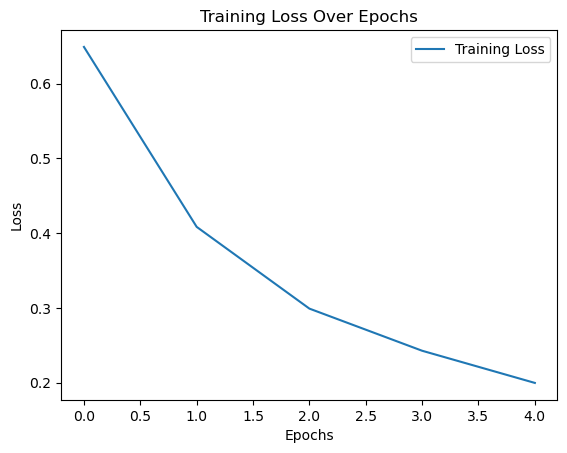

In [20]:
import torch.optim as optim
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Set up the model, optimizer, and loss function
model = SentimentAnalysisModel(vocab_size=vocab_size, embedding_dim=embedding_dim,
                               hidden_dim=hidden_dim)

# Binary Cross-Entropy loss function
loss_fn = nn.BCELoss()

# Optimizer (using Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model and plot the loss
torch.cuda.empty_cache()
train_model(model, loss_fn, optimizer, x_train_encoded, y_train, batch_size=32, epochs=5)

---

## **Task 10: Validation**
## 8 Points

In this task, you will extend the training loop from the previous task to incorporate validation metrics. The goal is to monitor how well the model generalizes to unseen data (validation set) during training. By including validation loss and accuracy, you can ensure that the model is not overfitting or underfitting to the training data and is performing consistently on validation data.

**Do the following:**
* Integrate Validation Tracking: Extend the train_model function to compute validation loss and validation accuracy at the end of each epoch using the pre-written helper function `evaluate model`. This function does the following:
    * Sets the model to evaluation mode (`model.eval()`).
    * Uses `torch.no_grad()` to ensure no gradients are calculated during validation.
    * The validation data is processed in mini-batches, iterating through the dataset with a specified batch_size.
    * Computes the validation loss and accuracy.

* Track the average training loss and accuracy for each epoch, as you did in the previous task.

* Visualize Results: Plot both training loss and validation loss over epochs to understand the model's learning progress and identify potential overfitting or underfitting.

* Plot validation accuracy over epochs to monitor how well the model is performing on unseen data.

* Output Results for Each Epoch:
Print the following metrics at the end of each epoch:
    * Training loss
    * Training accuracy
    * Validation loss
    * Validation accuracy

* From the results and the plots what can you say about the model's generalizability. Is the model overfitting or underfitting training data? Use your knowledge from the lectures and explain how the results can be improved.

In [22]:
# Function to evaluate the model on the validation set
def evaluate_model(model, val_data, val_labels, loss_fn, device, batch_size=32):
    model.eval()  # Set model to evaluation mode
    total_loss = 0
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():  # No gradient computation
        for i in range(0, len(val_data), batch_size):
            batch_data = torch.tensor(val_data[i:i+batch_size]).to(device)
            batch_labels = torch.tensor(val_labels[i:i+batch_size]).float().view(-1, 1).to(device)

            outputs = model(batch_data)
            loss = loss_fn(outputs, batch_labels)
            total_loss += loss.item()

            # Calculate accuracy
            predicted_labels = (outputs >= 0.5).float()
            correct_preds += (predicted_labels == batch_labels).sum().item()
            total_preds += batch_labels.size(0)

            # Free CUDA memory for the batch
            del batch_data, batch_labels, outputs, loss
            torch.cuda.empty_cache()

    avg_loss = total_loss / (len(val_data) // batch_size)
    accuracy = correct_preds / total_preds
    return avg_loss, accuracy


# Training function with validation tracking
def train_model(model, loss_fn, optimizer, train_data, train_labels, val_data, val_labels, batch_size=32, epochs=5):
    # Function implementation here
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_data = torch.tensor(train_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
    train_labels = torch.tensor(train_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)

    val_data = torch.tensor(val_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
    val_labels = torch.tensor(val_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)

    model.train()
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        epoch_loss = 0
        corr_preds = 0
        total_preds = 0

        permutations = torch.randperm(len(train_data))

        for i in range(0, len(train_data), batch_size):
            indices = permutations[i:i + batch_size]
            batch_data = train_data[indices].to(device)
            batch_labels = train_labels[indices].to(device)

            optimizer.zero_grad()

            outputs = model(batch_data)
            loss = loss_fn(outputs, batch_labels.unsqueeze(1).float())
            epoch_loss += loss.item()

            loss.backward()
            optimizer.step()

            predicted_labels = (outputs >= 0.5).float()
            corr_preds += (predicted_labels == batch_labels).sum().item()
            total_preds += batch_labels.size(0)

            del batch_data, batch_labels, outputs, loss
            torch.cuda.empty_cache()

        avg_loss = epoch_loss / (len(train_data) // batch_size)
        accuracy = corr_preds / total_preds

        val_loss, val_accuracy = evaluate_model(model, val_data, val_labels, loss_fn, device, batch_size)

        train_losses.append(avg_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Print epoch metrics
        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"  Training   Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
        print(f"  Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

    # Visualize training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(epochs), train_losses, label="Training Loss", marker="o")
    plt.plot(range(epochs), val_losses, label="Validation Loss", marker="x")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Epochs")
    plt.legend()
    plt.show()

    # Visualize validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker="s", color="g")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy Over Epochs")
    plt.legend()
    plt.show()

/tmp/ipykernel_7753/598720017.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_data = torch.tensor(val_data[i:i+batch_size]).to(device)
/tmp/ipykernel_7753/598720017.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_labels = torch.tensor(val_labels[i:i+batch_size]).float().view(-1, 1).to(device)


Epoch [1/5]
  Training   Loss: 0.6006, Accuracy: 16.1467
  Validation Loss: 0.4405, Accuracy: 0.7989
Epoch [2/5]
  Training   Loss: 0.3551, Accuracy: 16.3383
  Validation Loss: 0.3658, Accuracy: 0.8441
Epoch [3/5]
  Training   Loss: 0.2654, Accuracy: 16.3679
  Validation Loss: 0.3510, Accuracy: 0.8517
Epoch [4/5]
  Training   Loss: 0.2051, Accuracy: 16.4276
  Validation Loss: 0.3573, Accuracy: 0.8617
Epoch [5/5]
  Training   Loss: 0.1560, Accuracy: 16.4565
  Validation Loss: 0.4225, Accuracy: 0.8550


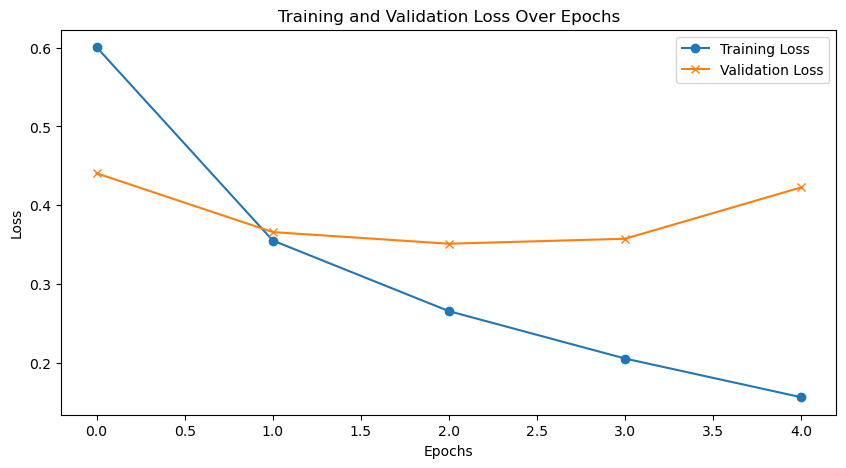

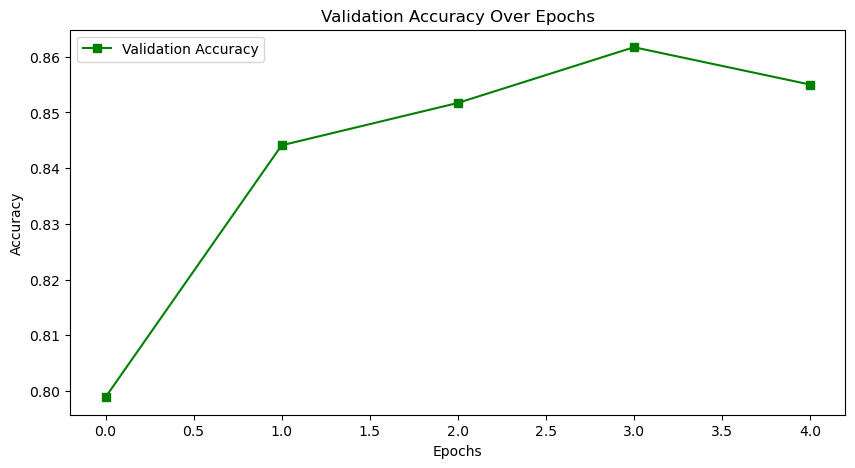

In [23]:
# Set up the model, optimizer, and loss function
model = SentimentAnalysisModel(vocab_size=vocab_size, embedding_dim=embedding_dim,
                               hidden_dim=hidden_dim)

# Binary Cross-Entropy loss function
loss_fn = nn.BCELoss()

# Optimizer (using Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

torch.cuda.empty_cache()
train_model(model, loss_fn, optimizer, x_train_encoded, y_train, x_val_encoded, y_val, batch_size=32, epochs=5)

The training loss is decreasing, however, the validation loss is increasing after 2 epochs, this implies that the model is overfitting on the training data as the training loss is decreasing, however, since the model is overfitting, the model lacks generalizability due to which the validation loss is increasing. 

This can be improved by 

---

## **Task 11: Evaluation**
## 10 Points

In this task, you will implement a function to evaluate your sentiment analysis model on the test dataset. The goal is to assess the final performance of the trained model on unseen data and to compute the test loss and accuracy.

**Do the following:**
* Implement the `evaluate_model_test` function: This function operates similarly to the validation evaluation but is executed after the training process is complete. It should compute both test loss and test accuracy. The function should:
    * Checks if a GPU is available and selects the appropriate device (cuda or cpu). This ensures that the model and data are moved to the correct computation device for efficient processing.
    * Set the model to evaluation mode using `model.eval()`
    * Use `torch.no_grad()` to avoid computing gradients since we don't need them for evaluation.
    * Perform evaluation in mini-batches (similar to the training process) by iterating over the test data.
    * Compute the loss and accuracy for each mini-batch and accumulate them.
    * Compute Average Loss and Accuracy for the dataset.
    * Return the average test loss and accuracy values.

In [24]:
# Evaluation function
def evaluate_model_test(model, loss_fn, test_data, test_labels, batch_size=32):
    # Function implementation here
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total_loss = 0
    corr_preds = 0
    total_preds = 0

    test_data = torch.tensor(test_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
    test_labels = torch.tensor(test_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)

    with torch.no_grad():
        for i in range(0, len(test_data), batch_size):
            batch_data = test_data[i:i + batch_size].to(device)
            batch_labels = test_labels[i:i + batch_size].float().view(-1, 1).to(device)

            outputs = model(batch_data)

            loss = loss_fn(outputs, batch_labels)
            total_loss += loss.item()

            predicted_labels = (outputs >= 0.5).float()
            corr_preds += (predicted_labels == batch_labels).sum().item()
            total_preds += batch_labels.size(0)

            del batch_data, batch_labels, outputs, loss
            torch.cuda.empty_cache()

    avg_loss = total_loss / (len(test_data) // batch_size)
    accuracy = corr_preds / total_preds

    return avg_loss, accuracy

In [25]:
# Evaluate the model on the test set
loss_fn = nn.BCELoss()
test_loss, test_accuracy = evaluate_model_test(model, loss_fn, x_test_encoded, y_test, batch_size=32)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.4296, Test Accuracy: 0.8503


---


## **Task 12: Evaluation**
## 20 Points 

This task focuses on refining the evaluation results obtained on the sentiment analysis model from the previous tasks. You will aim to improve the model's performance by adjusting its complexity, experimenting with hyperparameter tuning, and applying or modifying regularization techniques. The goal is to optimize the balance between model accuracy and generalization. You will evalulate your model on the test set like in task 11. You will be awarded points for this task only if the test accuracy after your improvements exceeds the test accuracy obtained in task 11 by 4%.

In [49]:
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset("imdb")

# Extract texts and labels into lists
train_texts = [example['text'] for example in dataset['train']]
train_labels = [example['label'] for example in dataset['train']]

test_texts = [example['text'] for example in dataset['test']]
test_labels = [example['label'] for example in dataset['test']]

# Combine into a single list if needed
texts = train_texts + test_texts
labels = train_labels + test_labels

In [53]:
import random
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

def synonym_replacement(words, n=2):
    """Replace n words in the sentence with their synonyms."""
    new_words = words.copy()
    random_words = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_words)
    num_replaced = 0
    
    for word in random_words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if w == word else w for w in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    
    return new_words

def random_deletion(words, p=0.1):
    """Randomly delete words from the sentence with probability p."""
    if len(words) == 1:
        return words
    return [word for word in words if random.uniform(0, 1) > p]

def random_swap(words, n=2):
    """Swap two words in the sentence n times."""
    new_words = words.copy()
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(new_words)), 2)
        new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]
    return new_words

def augment_text(text, num_augmentations=3):
    """Applies text augmentation techniques to a given text."""
    words = text.split()
    augmented_texts = []
    
    for _ in range(num_augmentations):
        choice = random.choice(["synonym", "deletion", "swap"])
        if choice == "synonym":
            augmented_texts.append(" ".join(synonym_replacement(words)))
        elif choice == "deletion":
            augmented_texts.append(" ".join(random_deletion(words)))
        elif choice == "swap":
            augmented_texts.append(" ".join(random_swap(words)))
    
    return augmented_texts

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nightwing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/nightwing/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Apply augmentation to dataset
augmented_texts = []
augmented_labels = []

for text, label in zip(texts, labels):
    augmented_versions = augment_text(text)
    augmented_texts.extend(augmented_versions)
    augmented_labels.extend([label] * len(augmented_versions))

# Add augmented data to original data
texts.extend(augmented_texts)
labels.extend(augmented_labels)

print(f"Dataset size after augmentation: {len(texts)}")

In [ ]:
import re
def preprocess_and_tokenize_review(review):
    """
    preprocesses and tokenizes reviews

    Args:
        review (str): one review from the dataset

    Returns:
        list of tokens (words)
    """
    # Convert text to lowercase
    review = review.lower()

    # Remove special characters
    review = re.sub(r"[^a-z0-9]+@#$%^&", " ", review)
    pattern = r'[\[\](){}]'
    review = re.sub(pattern, '', review)


    #tokenize into words
    tokenized_review = review.split()

    return tokenized_review

tokenized_texts = [preprocess_and_tokenize_review(text) for text in texts]
print(tokenized_texts[0])
assert len(tokenized_texts) == len(texts)

In [ ]:
from sklearn.model_selection import train_test_split

#split into train(60%) and val_test(40%)
x_train, x_val_test, y_train, y_val_test = train_test_split(tokenized_texts, labels, test_size=0.4, random_state=42)

#split val_test into val(50%) and test(50%)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

In [41]:
from collections import Counter

def create_vocabulary(tokenized_texts, max_vocab_size):
    """
    Creates a vocabulary from a list of tokenized texts.

    Args:
        tokenized_texts (list of list of str): A list of tokenized texts where each text is a list of tokens (words).
        max_vocab_size (int): The maximum number of words to include in the vocabulary. The most frequent words up to this size will be selected.

    Returns:
        dict: A dictionary representing the vocabulary where each key is a word and each value is its corresponding index.
              Special tokens "<PAD>" and "<OOV>" are also included in the vocabulary at indices 0 and 1, respectively.
    """

    vocab = {} # Initialize the vocabulary dict

    # Flatten the list of tokenized texts into a single list of words
    flattened = [word for text in tokenized_texts for word in text]

    # Count word frequencies
    token_count = Counter(flattened)

    # Select the top `max_vocab_size` most common words.
    most_common_tokens = token_count.most_common(max_vocab_size)

    # Add special tokens to the vocabulary
    vocab["<PAD>"] = 0  # Padding token
    vocab["<OOV>"] = 1  # Out-of-vocabulary token

    # Create a word-to-index mapping (vocabulary)
    for idx, (word, count) in enumerate(most_common_tokens, start=2):
        vocab[word] = idx

    return vocab

# Create the vocabulary
# vocab = create_vocabulary(x_train, max_vocab_size=25000)
vocab = create_vocabulary(tokenized_texts, max_vocab_size=25000)

# Print a sample of the vocabulary
print("Index of 'a':", vocab['a']) #should be in the vocabulary
print("Sample vocabulary:", list(vocab.items())[:10])
print("Vocabulary size:", len(vocab))

assert type(vocab) == type({})
assert vocab["<PAD>"] == 0
assert vocab["<OOV>"] == 1
assert len(vocab) == 25002

Index of 'a': 3
Sample vocabulary: [('<PAD>', 0), ('<OOV>', 1), ('the', 2), ('a', 3), ('and', 4), ('of', 5), ('to', 6), ('is', 7), ('in', 8), ('i', 9)]
Vocabulary size: 25002


In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_texts(tokenized_texts, vocab, max_length):
    """
    Converts tokenized texts into sequences of integers and pads them to a fixed length.

    Args:
        tokenized_texts (list of list of str): A list of tokenized texts, where each text is a list of words.
        vocab (dict): A dictionary representing the vocabulary, where each key is a word and each value is its corresponding index.
                      The vocabulary should include special tokens like <PAD> and <OOV>.
        max_length (int): The maximum length of the sequences after padding or truncation.

    Returns:
        numpy.ndarray: A 2D array where each row is a sequence of integers representing a text, and all sequences are padded to the specified `max_length`.
                       Sequences shorter than `max_length` are padded, and sequences longer than `max_length` are truncated.
    """
    # for each token in tokenized texts, replace the word with its corresponding index from the vocab
    encoded = [[vocab.get(token, vocab["<OOV>"]) for token in text] for text in tokenized_texts]
    padded_sequences = pad_sequences(encoded, maxlen=max_length, padding='post', truncating='post')

    return padded_sequences

# Define maximum sequence length
MAX_SEQ_LENGTH = 250

# Encode and pad training and testing data
x_train_encoded = encode_texts(x_train, vocab, MAX_SEQ_LENGTH)
x_val_encoded = encode_texts(x_val, vocab, MAX_SEQ_LENGTH)
x_test_encoded = encode_texts(x_test, vocab, MAX_SEQ_LENGTH)

# Print an example
print("Example encoded review from training set (first 5 words):", x_train_encoded[0][:5])
print("Example encoded review from validation set (first 5 words):", x_val_encoded[0][:5])
print("Example encoded review from test set (first 5 words):", x_test_encoded[0][:5])

print("Shape of training data:", x_train_encoded.shape)
print("Shape of validation data:", x_val_encoded.shape)
print("Shape of test data:", x_test_encoded.shape)

assert x_train_encoded.shape == (len(x_train), MAX_SEQ_LENGTH)
assert x_val_encoded.shape == (len(x_val), MAX_SEQ_LENGTH)
assert x_test_encoded.shape == (len(x_test), MAX_SEQ_LENGTH)

Example encoded review from training set (first 5 words): [    2    79     5     1 12744]
Example encoded review from validation set (first 5 words): [213 416 368   5   2]
Example encoded review from test set (first 5 words): [ 43  21 788   6 153]
Shape of training data: (30000, 250)
Shape of validation data: (10000, 250)
Shape of test data: (10000, 250)


In [43]:
import torch
import torch.nn as nn

VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 50

# Define the embedding layer
embedding_layer = nn.Embedding(VOCAB_SIZE, EMBEDDING_DIM)

# Example batch: A small batch of tokenized and padded sequences -> First 10 samples (batch size of 10)
example_batch = torch.tensor(x_train_encoded[:10])

# Pass the batch through the embedding layer
embedded_output = embedding_layer(example_batch)

# Print results
print("Input (word indices):")
print(example_batch)

print("\nOutput (embeddings):")
print(embedded_output)

print("\nEmbedding shape:")
print(embedded_output.shape)

Input (word indices):
tensor([[    2,    79,     5,  ...,     0,     0,     0],
        [    9,    98,    12,  ...,     0,     0,     0],
        [   10,    25,     7,  ...,     0,     0,     0],
        ...,
        [12661,    14,    40,  ...,     0,     0,     0],
        [    9,  2294,     2,  ...,     0,     0,     0],
        [    2,    20,   626,  ...,     0,     0,     0]], dtype=torch.int32)

Output (embeddings):
tensor([[[-0.9536,  0.6731, -0.6022,  ...,  1.0858, -0.4608,  0.5209],
         [-1.1000, -2.2410, -1.8916,  ...,  1.9011,  0.5512, -0.4170],
         [ 1.6830, -1.2060,  0.6822,  ..., -0.5783,  1.1924,  0.5122],
         ...,
         [-0.8796, -1.2811,  0.1308,  ...,  0.8853, -1.1746, -1.0679],
         [-0.8796, -1.2811,  0.1308,  ...,  0.8853, -1.1746, -1.0679],
         [-0.8796, -1.2811,  0.1308,  ...,  0.8853, -1.1746, -1.0679]],

        [[-1.4386, -0.2958, -0.2556,  ..., -1.0380,  1.7077, -1.2093],
         [-1.2036, -0.0734, -0.8752,  ..., -0.6907,  2.1611,  

In [44]:
word_embeddings = embedded_output.permute(1, 0, 2)  # Shape: [seq_len, batch_size, embedding_dim]
# Define a transformer encoder
transformer_layer = nn.TransformerEncoderLayer(d_model=EMBEDDING_DIM, nhead=1)
transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=1)

# Pass word embeddings through transformer encoder
transformer_output = transformer_encoder(word_embeddings)  # Shape: [seq_len, batch_size, embedding_dim]

# Get the output for the [CLS] token (first token in the sequence)
sequence_embeddings = transformer_output[0, :, :]  # Shape: [batch_size, embedding_dim] for the [CLS] token

print("Sequence Embeddings (Transformer) Shape:", sequence_embeddings.shape) #10 sequences

print(len(sequence_embeddings[0])) # Embedding dimension
print(sequence_embeddings[0][:10])

Sequence Embeddings (Transformer) Shape: torch.Size([10, 50])
50
tensor([-1.3059,  0.3697, -0.3540,  2.1249, -0.0701,  0.9020,  0.6770,  0.0740,
        -0.1693, -1.6023], grad_fn=<SliceBackward0>)


/home/nightwing/.local/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [46]:
import torch
import torch.nn as nn

class SentimentAnalysisModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_heads=1, num_layers=1):
        super(SentimentAnalysisModel, self).__init__()

        # Embedding layer: Converts word indices to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Transformer Encoder Layer (For Sequence Encoding)
        transformer_layer = nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=num_layers)

        # Fully connected (dense) layer
        self.fc = nn.Linear(embedding_dim, hidden_dim)

        # ReLU activation function
        self.relu = nn.ReLU()

        # Final output layer for binary classification (1 output)
        self.output_layer = nn.Linear(hidden_dim, 1)

        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Defines the forward pass for the sentiment analysis model.

        Args:
            x (torch.Tensor): Input tensor with shape [batch_size, seq_len], where each element
                              represents a word index in the vocabulary.

        Returns:
            torch.Tensor: A tensor of shape [batch_size, 1] containing sentiment probabilities
                          (values between 0 and 1, where 1 indicates positive sentiment).
        """
        # Pass through embedding layer: [batch_size, seq_len] -> [batch_size, seq_len, embedding_dim]
        x = self.embedding(x)

        # Rearrange shape for transformer input: [batch_size, seq_len, embedding_dim] -> [seq_len, batch_size, embedding_dim]
        x = x.permute(1, 0, 2)

        # Pass through transformer encoder
        x = self.transformer_encoder(x)

        # Get the output for the [CLS] token (first token in the sequence)
        x = x[0, :, :]  # [batch_size, embedding_dim] for the [CLS] token (first token)

        # Pass through the dense layer and apply ReLU activation
        x = self.fc(x)
        x = self.relu(x)

        # Final output layer
        x = self.output_layer(x)

        # Apply Sigmoid to get a probability between 0 and 1
        x = self.sigmoid(x)

        return x

In [47]:
import matplotlib.pyplot as plt

# Training function
def train_model(model, loss_fn, optimizer, train_data, train_labels, batch_size=32, epochs=5):
    # Check if GPU is available, otherwise use CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Move the model to the selected device (GPU or CPU)
    model.to(device)

    model.train()
    epoch_losses = []  # List to store loss for each epoch

    for epoch in range(epochs):
        epoch_loss = 0
        correct_preds = 0
        total_preds = 0

        train_data = torch.tensor(train_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
        train_labels = torch.tensor(train_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)

        # Shuffle the training data --> get a random permutation
        # Task: Complete the code to shuffle the training data properly
        # Use the appropriate PyTorch method to get the random permutation
        permutation = torch.randperm(len(train_data))

        # Mini-batch training loop
        for i in range(0, len(train_data), batch_size):
            # Get the batch
            # Task: Slice the data using the permutation to get the mini-batch
            # Hint: Use the permutation to select a mini-batch of data and labels
            indices = permutation[i:i + batch_size]
            batch_data = train_data[indices].to(device)
            batch_labels = train_labels[indices].to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass: Get model predictions
            outputs = model(batch_data)  # Pass the batch through the model


            # Calculate the loss
            # Task: Use the loss function to calculate the loss for the batch
            # loss = loss_fn(outputs, batch_labels)
            loss = loss_fn(outputs, batch_labels.unsqueeze(1).float())
            epoch_loss += loss.item()


            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            # Task: Perform backpropagation and optimization using the loss
            # Calculate accuracy for this batch
            predicted_labels = (outputs >= 0.5).float()  # Convert outputs to binary predictions
            correct_preds += (predicted_labels == batch_labels).sum().item()  # Count correct predictions
            total_preds += batch_labels.size(0)  # Count total predictions

        # Compute the average loss and accuracy for the epoch
        avg_loss = epoch_loss / (len(train_data) // batch_size)  # Compute average loss for the epoch
        accuracy = correct_preds / total_preds  # Compute accuracy for the epoch

        # Store the loss for this epoch
        epoch_losses.append(avg_loss)

        # Print the average loss and accuracy for the epoch
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Plot the training loss over epochs
    plt.plot(range(epochs), epoch_losses, label="Training Loss")  # Plot loss curve
    plt.xlabel('Epochs')  # Label for x-axis
    plt.ylabel('Loss')  # Label for y-axis
    plt.title('Training Loss Over Epochs')  # Title of the plot
    plt.legend()  # Display legend
    plt.show()  # Show the plot

In [48]:
import torch.optim as optim
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Set up the model, optimizer, and loss function
model = SentimentAnalysisModel(vocab_size=vocab_size, embedding_dim=embedding_dim,
                               hidden_dim=hidden_dim)

# Binary Cross-Entropy loss function
loss_fn = nn.BCELoss()

# Optimizer (using Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model and plot the loss
torch.cuda.empty_cache()
train_model(model, loss_fn, optimizer, x_train_encoded, y_train, batch_size=32, epochs=5)

NameError: name 'vocab_size' is not defined

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


class SentimentAnalysisModel_Improvement(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_heads=1, num_layers=1):
        super(SentimentAnalysisModel_Improvement, self).__init__()

        # Embedding layer: Converts word indices to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Transformer Encoder Layer (For Sequence Encoding)
        transformer_layer = nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=num_layers)

        # Fully connected (dense) layer
        self.fc = nn.Linear(embedding_dim, hidden_dim)

        # Add a dropout layer
        self.drop = nn.Dropout(0.2)

        # ReLU activation function
        self.relu = nn.ReLU()

        # Final output layer for binary classification (1 output)
        self.output_layer = nn.Linear(hidden_dim, 1)

        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Defines the forward pass for the sentiment analysis model.

        Args:
            x (torch.Tensor): Input tensor with shape [batch_size, seq_len], where each element
                              represents a word index in the vocabulary.

        Returns:
            torch.Tensor: A tensor of shape [batch_size, 1] containing sentiment probabilities
                          (values between 0 and 1, where 1 indicates positive sentiment).
        """
        # Pass through embedding layer: [batch_size, seq_len] -> [batch_size, seq_len, embedding_dim]
        x = self.embedding(x)

        # Rearrange shape for transformer input: [batch_size, seq_len, embedding_dim] -> [seq_len, batch_size, embedding_dim]
        x = x.permute(1, 0, 2)

        # Pass through transformer encoder
        x = self.transformer_encoder(x)

        # Get the output for the [CLS] token (first token in the sequence)
        x = x[0, :, :]  # [batch_size, embedding_dim] for the [CLS] token (first token)

        # Pass through the dense layer and apply ReLU activation
        x = self.fc(x)
        x = self.drop(x)
        x = self.relu(x)

        # Final output layer
        x = self.output_layer(x)

        # Apply Sigmoid to get a probability between 0 and 1
        x = self.sigmoid(x)

        return x

In [26]:
vocab_size = len(vocab)  # Number of unique words in the vocabulary
embedding_dim = 50       # Dimensionality of word embeddings
hidden_dim = 64          # Number of neurons in the hidden layer


# Instantiate the model
model = SentimentAnalysisModel_Improvement(vocab_size=vocab_size, embedding_dim=embedding_dim,
                               hidden_dim=hidden_dim)

# Example batch of encoded texts
example_batch = torch.tensor(x_train_encoded[:10])

# Pass the batch through the model
output = model(example_batch)

print("Model output shape:", output.shape)
print("Model output (probabilities):", output)

Model output shape: torch.Size([10, 1])
Model output (probabilities): tensor([[0.5051],
        [0.5280],
        [0.4299],
        [0.4612],
        [0.5618],
        [0.4039],
        [0.5610],
        [0.5162],
        [0.4880],
        [0.5103]], grad_fn=<SigmoidBackward0>)


/home/nightwing/.local/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [27]:
# Function to evaluate the model on the validation set
def evaluate_model(model, val_data, val_labels, loss_fn, device, batch_size=32):
    model.eval()  # Set model to evaluation mode
    total_loss = 0
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():  # No gradient computation
        for i in range(0, len(val_data), batch_size):
            batch_data = torch.tensor(val_data[i:i+batch_size]).to(device)
            batch_labels = torch.tensor(val_labels[i:i+batch_size]).float().view(-1, 1).to(device)

            outputs = model(batch_data)
            loss = loss_fn(outputs, batch_labels)
            total_loss += loss.item()

            # Calculate accuracy
            predicted_labels = (outputs >= 0.5).float()
            correct_preds += (predicted_labels == batch_labels).sum().item()
            total_preds += batch_labels.size(0)

            # Free CUDA memory for the batch
            del batch_data, batch_labels, outputs, loss
            torch.cuda.empty_cache()

    avg_loss = total_loss / (len(val_data) // batch_size)
    accuracy = correct_preds / total_preds
    return avg_loss, accuracy


# Training function with validation tracking
def train_model(model, loss_fn, optimizer, train_data, train_labels, val_data, val_labels, batch_size=32, epochs=5):
    # Function implementation here
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_data = torch.tensor(train_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
    train_labels = torch.tensor(train_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)

    val_data = torch.tensor(val_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
    val_labels = torch.tensor(val_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)

    model.train()
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        epoch_loss = 0
        corr_preds = 0
        total_preds = 0

        permutations = torch.randperm(len(train_data))

        for i in range(0, len(train_data), batch_size):
            indices = permutations[i:i + batch_size]
            batch_data = train_data[indices].to(device)
            batch_labels = train_labels[indices].to(device)

            optimizer.zero_grad()

            outputs = model(batch_data)
            loss = loss_fn(outputs, batch_labels.unsqueeze(1).float())
            epoch_loss += loss.item()

            loss.backward()
            optimizer.step()

            predicted_labels = (outputs >= 0.5).float()
            corr_preds += (predicted_labels == batch_labels).sum().item()
            total_preds += batch_labels.size(0)

            del batch_data, batch_labels, outputs, loss
            torch.cuda.empty_cache()

        avg_loss = epoch_loss / (len(train_data) // batch_size)
        accuracy = corr_preds / total_preds

        val_loss, val_accuracy = evaluate_model(model, val_data, val_labels, loss_fn, device, batch_size)

        train_losses.append(avg_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Print epoch metrics
        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"  Training   Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
        print(f"  Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

    # Visualize training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(epochs), train_losses, label="Training Loss", marker="o")
    plt.plot(range(epochs), val_losses, label="Validation Loss", marker="x")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Epochs")
    plt.legend()
    plt.show()

    # Visualize validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker="s", color="g")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy Over Epochs")
    plt.legend()
    plt.show()

/tmp/ipykernel_29208/598720017.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_data = torch.tensor(val_data[i:i+batch_size]).to(device)
/tmp/ipykernel_29208/598720017.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_labels = torch.tensor(val_labels[i:i+batch_size]).float().view(-1, 1).to(device)


Epoch [1/5]
  Training   Loss: 0.6176, Accuracy: 16.1235
  Validation Loss: 0.4852, Accuracy: 0.7641
Epoch [2/5]
  Training   Loss: 0.3648, Accuracy: 16.3099
  Validation Loss: 0.3532, Accuracy: 0.8505
Epoch [3/5]
  Training   Loss: 0.2700, Accuracy: 16.3893
  Validation Loss: 0.3415, Accuracy: 0.8585
Epoch [4/5]
  Training   Loss: 0.2123, Accuracy: 16.4063
  Validation Loss: 0.3562, Accuracy: 0.8611
Epoch [5/5]
  Training   Loss: 0.1643, Accuracy: 16.4634
  Validation Loss: 0.3773, Accuracy: 0.8609


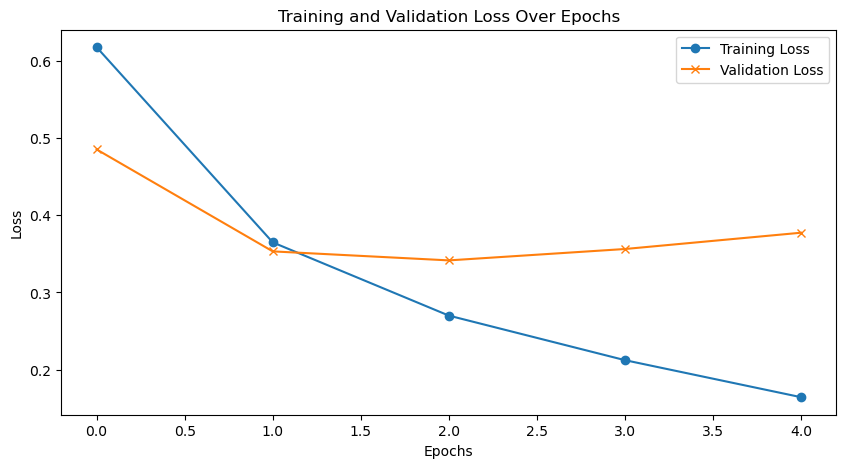

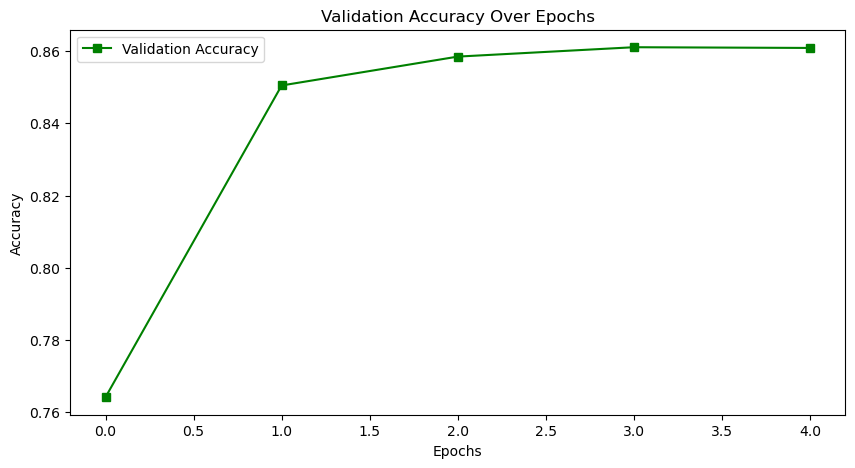

In [28]:
# Set up the model, optimizer, and loss function
model = SentimentAnalysisModel_Improvement(vocab_size=vocab_size, embedding_dim=embedding_dim,
                               hidden_dim=hidden_dim)

# Binary Cross-Entropy loss function
loss_fn = nn.BCELoss()

# Optimizer (using Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

torch.cuda.empty_cache()
train_model(model, loss_fn, optimizer, x_train_encoded, y_train, x_val_encoded, y_val, batch_size=32, epochs=5)

In [29]:
# Evaluation function
def evaluate_model_test(model, loss_fn, test_data, test_labels, batch_size=32):
    # Function implementation here
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total_loss = 0
    corr_preds = 0
    total_preds = 0

    test_data = torch.tensor(test_data, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)
    test_labels = torch.tensor(test_labels, dtype=torch.float if loss_fn.__class__.__name__ == 'MSELoss' else torch.long)

    with torch.no_grad():
        for i in range(0, len(test_data), batch_size):
            batch_data = test_data[i:i + batch_size].to(device)
            batch_labels = test_labels[i:i + batch_size].float().view(-1, 1).to(device)

            outputs = model(batch_data)

            loss = loss_fn(outputs, batch_labels)
            total_loss += loss.item()

            predicted_labels = (outputs >= 0.5).float()
            corr_preds += (predicted_labels == batch_labels).sum().item()
            total_preds += batch_labels.size(0)

            del batch_data, batch_labels, outputs, loss
            torch.cuda.empty_cache()

    avg_loss = total_loss / (len(test_data) // batch_size)
    accuracy = corr_preds / total_preds

    return avg_loss, accuracy

In [30]:
# Evaluate the model on the test set
loss_fn = nn.BCELoss()
test_loss, test_accuracy = evaluate_model_test(model, loss_fn, x_test_encoded, y_test, batch_size=8)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.3748, Test Accuracy: 0.8625


---

# **THE END 🌝**

## **Auto-Grading** (this section is only for the evaluator and not for students)

Run all of the cells above and then run the cell below to run all tests for tasks 1 to 8 at once. Make sure `inputs.txt` is available.

In [ ]:
%%ipytest -vvrN --tb=short
# DONOT ALTER THIS CODE!
Total_points = 100
obtained = 0  # Global variable

with open('inputs.txt', 'r') as file:
    file_content = file.read()

test_inputs = eval(file_content)
tests = test_inputs["test_preprocess_tokenize"]

@pytest.mark.parametrize("inputs, expected", tests)
def test_task1(inputs, expected):
    global obtained
    out = str(preprocess_and_tokenize_review(inputs))
    assert out == str(expected), (
        f'\nYour Output:\n    {repr(out)}\n'
        f'Expected Output:\n    {repr(str(expected))}'
    )

def test_lengthConsistency_IMDB():
    global obtained
    assert len(tokenized_texts) == len(texts), (
        f"Length mismatch: len(tokenized_texts)={len(tokenized_texts)} != len(texts)={len(texts)}"
    )
    obtained += 10

def test_task2():
    global obtained
    assert len(x_train) == 30000, (
        f"Length mismatch: len(x_train)={len(x_train)} != 30000"
    )
    assert len(x_val) == 10000, (
        f"Length mismatch: len(x_val)={len(x_val)} != 10000"
    )
    assert len(x_test) == 10000, (
        f"Length mismatch: len(x_test)={len(x_test)} != 10000"
    )
    assert len(x_train) == len(y_train), (
        f"Length mismatch: len(x_train)={len(x_train)} != len(y_train)={len(y_train)}"
    )
    assert len(x_val) == len(y_val), (
        f"Length mismatch: len(x_val)={len(x_val)} != len(y_val)={len(y_val)}"
    )
    assert len(x_test) == len(y_test), (
        f"Length mismatch: len(x_test)={len(x_test)} != len(y_test)={len(y_test)}"
    )
    assert len(x_train + x_val + x_test) == len(texts), (
        f"Total length mismatch: len(x_train + x_val + x_test)={len(x_train + x_val + x_test)} != len(texts)={len(texts)}"
    )
    obtained += 5

@pytest.mark.parametrize("inputs, expected", test_inputs["test_create_vocab"])
def test_task3(inputs, expected):
    global obtained
    out = str(create_vocabulary(eval(inputs), 50))
    assert out == str(expected), (
        f'\nYour Output:\n    {repr(out)}\n'
        f'Expected Output:\n    {repr(str(expected))}'
    )


def test_vocab_type_length_consistency():
    global obtained
    assert type(vocab) == type({}), (
        f"Type mismatch: type(vocab)={type(vocab)} != {type({})}"
    )
    assert vocab["<PAD>"] == 0, (
        f"""<PAD> token not assigned index 0: vocab["<PAD>"] != 0"""
    )
    assert vocab["<OOV>"] == 1, (
        f"""<OOV> token not assigned index 1: vocab["<OOV>"] != 1"""
    )
    assert len(vocab) == 25002, (
        f"Length mismatch: len(vocab)={len(vocab)} != 25002"
    )
    obtained += 10

@pytest.mark.parametrize("inputs, expected", test_inputs["test_encode_texts"])
def test_task4(inputs, expected):
    global obtained
    tokens, vocab = eval(inputs)
    out = str(encode_texts(tokens, vocab, 100))
    assert out == str(expected), (
        f'\nYour Output:\n    {repr(out)}\n'
        f'Expected Output:\n    {repr(str(expected))}'
    )


def test_encoded_data_shape_consistency():
    global obtained
    assert x_train_encoded.shape == (len(x_train), MAX_SEQ_LENGTH), (
        f"Incorrect shape: x_train_encoded.shape={x_train_encoded.shape} != {(len(x_train), MAX_SEQ_LENGTH)}"
    )
    assert x_val_encoded.shape == (len(x_val), MAX_SEQ_LENGTH), (
        f"Incorrect shape: x_val_encoded.shape={x_val_encoded.shape} != {(len(x_val), MAX_SEQ_LENGTH)}"
    )
    assert x_test_encoded.shape == (len(x_test), MAX_SEQ_LENGTH), (
        f"Incorrect shape: x_test_encoded.shape={x_test_encoded.shape} != {(len(x_test), MAX_SEQ_LENGTH)}"
    )
    obtained += 10

def test_task5():
    global obtained
    assert example_batch.shape == torch.Size([10, 250]), (
        f"Incorrect tensor shape: example_batch.shape={example_batch.shape} != {torch.Size([10, 250])}"
    )
    assert embedded_output.shape == torch.Size([10, 250, 50]), (
        f"Incorrect tensor shape: embedded_output.shape={embedded_output.shape} != {torch.Size([10, 250, 50])}"
    )
    obtained += 5

def test_task6():
    global obtained
    assert dense_output.shape == torch.Size([10, 64]), (
        f"Incorrect tensor shape: dense_output.shape={dense_output.shape} != {torch.Size([10, 64])}"
    )
    assert activated_output.shape == torch.Size([10, 64]), (
        f"Incorrect tensor shape: activated_output.shape={activated_output.shape} != {torch.Size([10, 64])}"
    )
    obtained += 5

def test_task7():
    global obtained
    assert final_output.shape == torch.Size([10, 1]), (
        f"Incorrect tensor shape: final_output.shape={final_output.shape} != {torch.Size([10, 1])}"
    )
    assert probabilities.shape == torch.Size([10, 1]), (
        f"Incorrect tensor shape: probabilities.shape={probabilities.shape} != {torch.Size([10, 1])}"
    )
    obtained += 5

def test_task8():
    global obtained
    assert output.shape == torch.Size([10, 1]), (
        f"Incorrect tensor shape: output.shape={output.shape} != {torch.Size([10, 1])}"
    )
    obtained += 5

In [ ]:
print(f'Score of 8 Tasks: {obtained}')